# Ozone Data Mining (sample station: BETN073)

### Plain txt file to dataframe
Data is being read from disk as a CSV file.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta

fname = "AirBase_BE_v7/BETN073/BETN0730000700100dymax.1-1-1990.31-12-2011"

columnNames = ['month']
for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
    columnNames.append(str(i))
    columnNames.append('validity{}'.format(i))

df1 = pd.read_csv(fname, sep='\t', names=columnNames, lineterminator='\n')
df1['month'] = pd.to_datetime(df1['month'])

### Daily time-series (from 1-1-1990 to 31-12-2011)
Initialization of an empty multi-variate time-series frame.
*Note:'Var1' is added as a placeholder for future time-series data augmentation (with weather data for a station).*

In [70]:
minDate = min(df1['month'])
maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=['O3', 'Var1'])
print ("Min date: {}, Max Date: {}".format(minDate, maxDate))

Min date: 1990-01-01 00:00:00, Max Date: 2011-12-31 00:00:00


### Filling empty ts with (valid only sensor readings: {1}) O3 data (with invalid readings {-1, 0} as Nans)
Only valid ozone data is inserted into the time-series.

In [71]:
for row in df1.itertuples(index=True, name='df1'): # Foreach month
    date = row[1]
    for columnIndex in range(1, df1.shape[1]): # Foreach day
        if columnIndex % 2 == 0: # Even column
            if row[columnIndex + 1] == 1: # If sensor reading valid
                currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day           
                ts.at[currentDate, 'O3'] = row[columnIndex] # Set value to time-series
#                 print("date: {}, currentDate: {}, columnIndex: {}, value: {}, validity: {}"
#                       .format(date, currentDate, columnIndex, row[columnIndex], row[columnIndex + 1]))                

### First month data
CSV vs time-series data-frame (first 31 days of January 1990).

In [72]:
# First 31 dayCSV vs time-series data-frame (last month).s of CSV data
df1.head(1)

,month,1,validity1,2,validity2,3,validity3,4,validity4,5,...,27,validity27,28,validity28,29,validity29,30,validity30,31,validity31
0,1990-01-01,48.714,0,7.0,0,34.333,0,12.714,1,14.5,...,77.5,1,81.286,1,62.875,1,60.667,1,65.5,1


In [73]:
# First 31 days of time-series data
ts.head(31)

,O3,Var1
1990-01-01,NaN,NaN
1990-01-02,NaN,NaN
1990-01-03,NaN,NaN
1990-01-04,12.714,NaN
1990-01-05,14.500,NaN
1990-01-06,23.143,NaN
1990-01-07,NaN,NaN
1990-01-08,20.625,NaN
1990-01-09,36.750,NaN
1990-01-10,54.571,NaN


### Last month data
CSV vs time-series data-frame (31 days of December 2011).

In [74]:
# Last 31 days of CSV data
df1.tail(1)

,month,1,validity1,2,validity2,3,validity3,4,validity4,5,...,27,validity27,28,validity28,29,validity29,30,validity30,31,validity31
263,2011-12-01,37.5,1,49.875,1,50.062,1,56.857,1,58.312,...,52.375,1,39.0,1,57.357,0,61.938,1,40.786,1


In [75]:
# Last 31 days of time-series data
ts.tail(31)

,O3,Var1
2011-12-01,37.500,NaN
2011-12-02,49.875,NaN
2011-12-03,50.062,NaN
2011-12-04,56.857,NaN
2011-12-05,58.312,NaN
2011-12-06,52.500,NaN
2011-12-07,55.688,NaN
2011-12-08,55.438,NaN
2011-12-09,61.938,NaN
2011-12-10,50.250,NaN


Histogram (50 bins) and boxplot of all the O3 values of the first year. There seem to be two outliers.

C:\Users\temp3rr0r\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\temp3rr0r\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\temp3rr0r\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\temp3rr0r\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\temp3rr0r\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


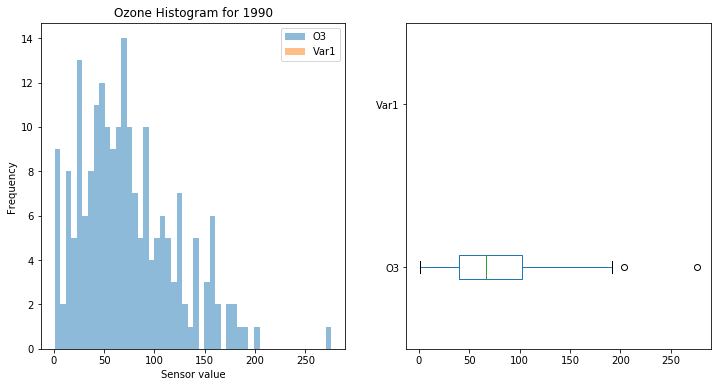

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_xlabel('Sensor value')
ax[0].set_title('Ozone Histogram for 1990')
ax[0].grid(True)
ts.head(365).plot.hist(alpha=0.5, bins=50, ax = ax[0]);
ts.head(365).plot.box(vert=False, ax = ax[1]);

Some basic descriptive statistics for the first year:

In [78]:
from pandas.plotting import table

#fig, ax = plt.subplots(1, 1)
#table(ax, np.round(ts.head(365).describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])
#ts.head(365).plot(ax=ax, ylim=(0, 2), legend=None)
ts.head(365).describe()

,O3,Var1
count,206.000000,0.0
mean,73.911083,NaN
std,47.328933,NaN
min,1.125000,NaN
25%,40.294750,NaN
50%,67.083500,NaN
75%,102.125000,NaN
max,275.833000,NaN


Time-series plot of O3, first 365 days (1990, with missing data):

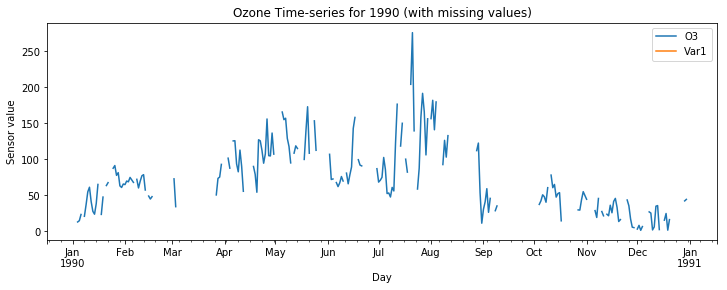

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
ts.head(365).plot(ax = ax);

Not useful interpolations: Cubic and Spline (order 2-5+) seem to have very high leverage, skewing the original data:

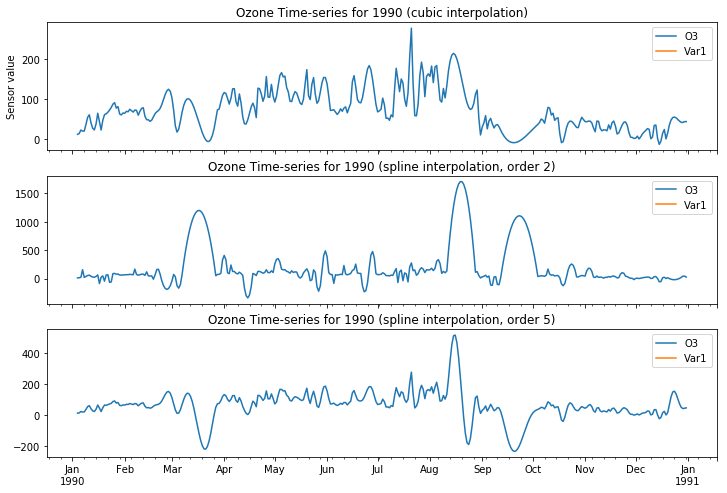

In [122]:
ts2a = ts.interpolate(method='cubic')
ts2b = ts.interpolate(method='spline',order=2)
ts2c = ts.interpolate(method='spline',order=5)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=False)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[0].set_title('Ozone Time-series for 1990 (cubic interpolation)')
ax[1].set_title('Ozone Time-series for 1990 (spline interpolation, order 2)')
ax[2].set_title('Ozone Time-series for 1990 (spline interpolation, order 5)')
ts2a.head(365).plot(ax = ax[0]);
ts2b.head(365).plot(ax = ax[1]);
ts2c.head(365).plot(ax = ax[2]);

Useful interpolations: 'from_derivatives' (piecewise polynomial interpolation) and linear. (Probably) the most interesting interpolation: PCHIP 1-d monotonic cubic interpolation (see:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html#scipy.interpolate.PchipInterpolator). Compared to the plain cubic interpolation, doesn't seem to skew the original data points. It looks similar to the linear interpolation, with some extra smoothing.

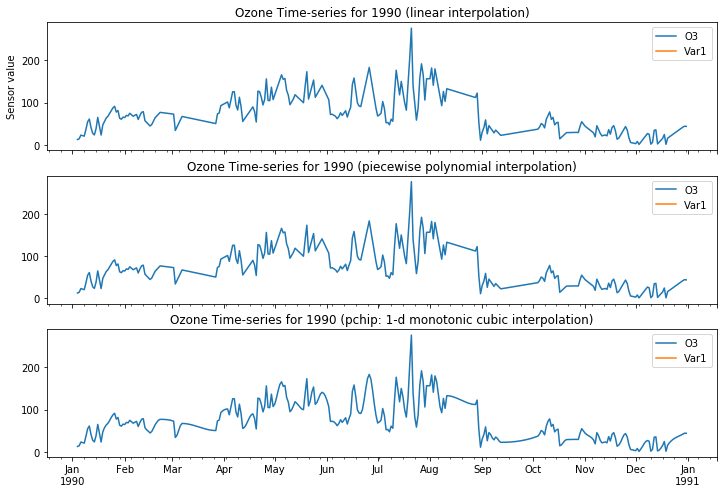

In [119]:
ts2a = ts.interpolate(method='linear')
ts2b = ts.interpolate(method='from_derivatives')
ts2c = ts.interpolate(method='pchip')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[1].set_title('Ozone Time-series for 1990 (piecewise polynomial interpolation)')
ax[2].set_title('Ozone Time-series for 1990 (pchip: 1-d monotonic cubic interpolation)')
ax[0].set_title('Ozone Time-series for 1990 (linear interpolation)')
ts2a.head(365).plot(ax = ax[0]);
ts2b.head(365).plot(ax = ax[1]);
ts2c.head(365).plot(ax = ax[2]);

# Meta-data for all O3 stations

Reading the 'BE-meta.xml' file, for the stations in Belgium.

In [1]:
import xml.etree.ElementTree as ET
tree = ET.parse('BE_meta.xml')
root = tree.getroot()

In [2]:
root.tag

'airbase'

In [3]:
for child in root:
    print(child.tag, child.attrib)

country {}


Example browsing the meta-data of the station 73 - VEZIN in Belgium:

In [4]:
# TODO: Ozone max8 
    # <measurement_configuration component = 'Ozone (air) - UV absorption'>
# TODO: PM10 Daily Average

for child in root:    
    for child1 in child:          
        if child1.tag == "station":
            if child1.attrib['Id']=="BETN073:43N073 - VEZIN":
                for child2 in child1:
                    if child2.tag == "measurement_configuration":
                        if child2.attrib['component'] == "Ozone (air) - UV absorption":
                            for child3 in child2:
                                if child3.tag == "statistics":
                                    if child3.attrib['Year'] == "2010":
                                        for child4 in child3:
                                            if child4.tag == "statistics_average_group":
                                                if child4.attrib['value'] == "day":
                                                    for child5 in child4:
                                                        if child5.tag == "statistic_set":
                                                            if child5.attrib['type'] == "General":
                                                                for child6 in child5:
#                                                                     print ("tag: {}, attrib: {}, text: {}".format(child5.tag, child5.attrib, child5.text))
                                                                    if child6.tag == "statistic_result":
                                                                        #<statistic_shortname>Max8
                                                                        print ("tag: {}, attrib: {}, text: {}".format(child6.tag, child6.attrib, child6.text))
                                                                        for child7 in child6:
                                                                            print ("tag: {}, attrib: {}, text: {}".format(child7.tag, child7.attrib, child7.text))
#                                                                             if child7.tag == "statistic_shortname" and child7.text == "Max8":
#                                                                                 for child8 in child7:
#                                                                                     print ("tag: {}, attrib: {}, text: {}".format(child8.tag, child8.attrib, child8.text))

tag: statistic_result, attrib: {}, text: 
								
tag: statistic_name, attrib: {}, text: annual mean
tag: statistic_shortname, attrib: {}, text: Mean
tag: statistic_value, attrib: {}, text: 42.576
tag: statistic_result, attrib: {}, text: 
								
tag: statistic_name, attrib: {}, text: 50 percentile
tag: statistic_shortname, attrib: {}, text: P50
tag: statistic_value, attrib: {}, text: 42.646
tag: statistic_result, attrib: {}, text: 
								
tag: statistic_name, attrib: {}, text: 95 percentile
tag: statistic_shortname, attrib: {}, text: P95
tag: statistic_value, attrib: {}, text: 71.717
tag: statistic_result, attrib: {}, text: 
								
tag: statistic_name, attrib: {}, text: 98 percentile
tag: statistic_shortname, attrib: {}, text: P98
tag: statistic_value, attrib: {}, text: 86.812
tag: statistic_result, attrib: {}, text: 
								
tag: statistic_name, attrib: {}, text: maximum
tag: statistic_shortname, attrib: {}, text: Max
tag: statistic_value, attrib: {}, text: 103.688


List of all the measurement stations in Belgium:

In [146]:
for child in root:    
#     print(child.tag, child.attrib, child.text)
    for child1 in child:        
        print ("tag: {}, attrib: {}, text: {}".format(child1.tag, child1.attrib, child1.text))
        #for child2 in child1:
            #print(child2.tag, child2.attrib, child2.text)
            #print ("tag: {}, attrib: {}, text: {}".format(child2.tag, child2.attrib, child2.text))
            #for child3 in child2:
                #print(child2.tag, child2.attrib, child2.text)
                #print ("tag: {}, attrib: {}, text: {}".format(child3.tag, child3.attrib, child3.text))
                #for child4 in child3:
                    #print(child2.tag, child2.attrib, child2.text)
                    #print ("tag: {}, attrib: {}, text: {}".format(child4.tag, child4.attrib, child4.text))

tag: country_name, attrib: {}, text: BELGIUM
tag: country_iso_code, attrib: {}, text: BE
tag: country_eu_member, attrib: {}, text: Y
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: station, attrib: {'Id': 'BEMAT01:00AT01 - ANTWERPEN'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE01:00BE01 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE02:00BE02 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE06:00BE06 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE07:00BE07 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE08:00BE08 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE09:00BE09 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE10:00BE10 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE11:00BE11 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE15:00BE15 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMEK0

All the available XML tags:

In [109]:
import re, collections
from lxml import etree

raw_tree = etree.parse("BE_meta.xml")
xml_root = tree.getroot()
xml = etree.tostring(tree.getroot())
  
xml_root = etree.fromstring(xml)
raw_tree = etree.ElementTree(xml_root)
nice_tree = collections.OrderedDict()
 
for tag in xml_root.iter():
    path = re.sub('\[[0-9]+\]', '', raw_tree.getpath(tag))
    if path not in nice_tree:
        nice_tree[path] = []
    if len(tag.keys()) > 0:
        nice_tree[path].extend(attrib for attrib in tag.keys() if attrib not in nice_tree[path])            
 
for path, attribs in nice_tree.items():
    indent = int(path.count('/') - 1)
    print('{0}{1}: {2} [{3}]'.format('    ' * indent, indent, path.split('/')[-1], ', '.join(attribs) if len(attribs) > 0 else '-'))

0: airbase [{http://www.w3.org/2001/XMLSchema-instance}noNamespaceSchemaLocation]
    1: country [-]
        2: country_name [-]
        2: country_iso_code [-]
        2: country_eu_member [-]
        2: network [-]
            3: network_code [-]
            3: network_name [-]
            3: network_short_name [-]
            3: network_start_date [-]
            3: network_time_reference_basis [-]
            3: network_type [-]
            3: network_manager [-]
                4: organization [-]
                    5: organization_name [-]
                    5: organization_address [-]
                    5: organization_city [-]
                    5: organization_phone_number [-]
                    5: organization_fax_number [-]
                4: person [-]
                    5: person_last_name [-]
                    5: person_first_name [-]
        2: station [Id]
            3: station_european_code [-]
            3: network_info [-]
                4: network_code [-